In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [23]:
path_SO_presence = 'C:/Users/Dmitry/Desktop/НИР/Data/CSV/State_Presence_industry_by_assets.csv' 
path_SO_gen_presence = 'C:/Users/Dmitry/Desktop/НИР/Data/CSV/State_Presence_industry_gen_by_assets.csv'
prs = pd.read_csv(path_SO_presence, sep = ',')
prs_gen = pd.read_csv(path_SO_gen_presence, sep = ',')

prs = prs.iloc[:,1:]


In [3]:
prs = pd.read_csv(path_SO_presence, sep = ',')

In [4]:
prs.join(prs.iloc[:,2:].agg([np.mean], axis = 1)).iloc[:, [1,-1]]

,Group.1,mean
0,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,0.108351
1,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,0.623455
2,"AGRICULTURE, FORESTRY AND FISHING",0.067631
3,"ARTS, ENTERTAINMENT AND RECREATION",0.860373
4,CONSTRUCTION,0.321122
5,EDUCATION,0.033320
6,HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,0.371440
7,INFORMATION AND COMMUNICATION,0.595866
8,MANUFACTURING,0.422806
9,MINING AND QUARRYING,0.569730


In [5]:
path_csv = 'C:/Users/Dmitry/Desktop/НИР/SO_ind.csv'
path_POD = 'C:/Users/Dmitry/Desktop/НИР/POD_ind.csv'
path_POF = 'C:/Users/Dmitry/Desktop/НИР/POF_ind.csv'
SO = pd.read_csv(path_csv, sep = ';').drop_duplicates()
SO = SO[~SO['Название.компании.Latin.alphabet'].duplicated()]
SO.index = range(0, SO.shape[0])

POD = pd.read_csv(path_POD, sep = ';').drop_duplicates()
POD = POD[~POD['Название.компании.Latin.alphabet'].duplicated()]
POD.index = range(0, POD.shape[0])

POF = pd.read_csv(path_POF, sep = ';').drop_duplicates()
POF = POF[~POF['Название.компании.Latin.alphabet'].duplicated()]
POF.index = range(0, POF.shape[0])

PO = pd.concat([POD, POF[~POF['Название.компании.Latin.alphabet']
                         .isin(POD['Название.компании.Latin.alphabet'].unique())]])
PO.index = range(0, PO.shape[0])

for i in [PO,POF,POD,SO]:
    i = i.replace('n.a.',np.nan)

In [6]:
#check columns order matching
for po, so in zip(PO.columns, SO.columns):
    if po != so: 
        print(po, so)
        
#fully matched together :D

In [7]:
## quintiles by assets:
criterion = SO[['Общие.активы.тыс.доллар.США.' + str(i) for i in range(2012,2021)]].agg('mean', axis = 1)
SO20q_largest =  SO[criterion > criterion.quantile(.8)]
SO_rest = SO[criterion <= criterion.quantile(.8)]
SO_noex = SO[(criterion <= criterion.quantile(.99)) & (criterion > criterion.quantile(.8))]
SO_yesex = SO[criterion > criterion.quantile(.99)]

In [8]:
criterion = PO[['Общие.активы.тыс.доллар.США.' + str(i) for i in range(2012,2021)]].agg('mean', axis = 1)
PO20q_largest =  PO[criterion > criterion.quantile(.8)]
PO_rest = PO[criterion <= criterion.quantile(.8)]
PO_noex = PO[(criterion <= criterion.quantile(.98)) & (criterion > criterion.quantile(.8))]
PO_yesex = PO[criterion > criterion.quantile(.98)]

In [9]:
coefs_names = ['Gearing...отношение.уровня.долга.компании.и.ее.собственного.капитала....Read.more..Gearing.https...www.investopedia.com.terms.g.gearing.asp.ixzz53lOQa7Ns.Follow.us..Investopedia.on.Facebook.....',
               'Коэффициент.платежеспособности..в.основе.активы......', 'Коэффициент.ликвидности.', 'Текущий.коэффициент.',
               'Маржа.прибыли.....', 'EBIT.Маржа.....', 'EBITDA.маржа.....', 'Прибыль.на.задействованный.капитал..ROCE..в.основе.чистый.доход.....',
               'Прибыль.на.акционерный.капитал..ROE..на.основе.чистого.дохода.....', 'Прибыль.на.общую.сумму.активов..ROA..при.использовании.отчета.о.прибылях.и.убытках.до.налогообложения.....']
colnames = ['gearing.','solvency.based.on.shareholder.cap' , 'abs.liq', 'current.liq',
            'sales.profitability.NET.PROFIT', 'sales.profitability.EBIT','sales.profitability.EBITDA','ROCE',
            'ROE.NET.PROFIT','ROA.EBIT']
PO_coef_frame = pd.DataFrame(PO[['Название.компании.Latin.alphabet','industry']])
for year in range(2012,2021):
    PO_coef_frame[[s + str(year) for s in colnames]] = PO[[s + str(year) for s in coefs_names]]
    
PO_coef_frame[['gearing.' + str(i) for i in range(2012,2021)]] = PO_coef_frame[['gearing.'
                                                                                + str(i) for i in range(2012,2021)]] / 100

PO_coef_frame[['sales.profitability.EBIT' + str(i) for i in range(2012,2021)]] = PO_coef_frame[['sales.profitability.EBIT' 
                                                                                                + str(i) for i in range(2012,2021)]] / 100


PO_coef_frame[['sales.profitability.EBITDA' + str(i) for i in range(2012,2021)]] = PO_coef_frame[['sales.profitability.EBITDA'
                                                                                                  + str(i) for i in range(2012,2021)]] / 100

PO_coef_frame[['sales.profitability.NET.PROFIT' + str(i) for i in range(2012,2021)]] = PO_coef_frame[['sales.profitability.NET.PROFIT'
                                                                                                      + str(i) for i in range(2012,2021)]] / 100

In [10]:
#Coefficients:
for year in range(2012, 2021):
    PO_coef_frame['autonomy.coef.' + str(year)] = (PO['Средства.акционеров.тыс.доллар.США.' + str(year)]/
                                                   PO['Общие.активы.тыс.доллар.США.' + str(year)])
    PO_coef_frame['ROA.NET.PROFIT' + str(year)] = (PO['Прибыль.убыток.за.период....Чистая.прибыль..тыс.доллар.США.' + str(year)]/
                                                   PO['Общие.активы.тыс.доллар.США.' + str(year)]) * 100
    PO_coef_frame['ROE.EBIT' + str(year)] = (PO['EBIT.Маржа.....' + str(year)] / 100 * 
                                             PO['Выручка..оборот..тыс.доллар.США.' + str(year)] / 
                                             PO['Средства.акционеров.тыс.доллар.США.' + str(year)]) * 100
    if year == 2012:
        PO_coef_frame['resource.allocation2012'] = (PO['Средства.акционеров.тыс.доллар.США.2012'] / 
                                                    PO['Общие.активы.тыс.доллар.США.2012'])
    else:
        PO_coef_frame['resource.allocation' + str(year)] = (PO['Средства.акционеров.тыс.доллар.США.' + str(year)] /
                                                            (PO['Общие.активы.тыс.доллар.США.' + str(year - 1)] +
                                                                PO['Общие.активы.тыс.доллар.США.' + str(year)])) * 2

PO_coef_frame.replace([np.inf, -np.inf], np.nan, inplace = True)        
        
SO_coef_frame = pd.read_csv('C:/Users/Dmitry/Desktop/НИР/SO_coefs.csv' , sep = ';').drop_duplicates()
SO_coef_frame=SO_coef_frame.rename(columns = {'SO.Название.компании.Latin.alphabet':
                                              'Название.компании.Latin.alphabet'})
SO_coef_frame = pd.merge(SO[['Название.компании.Latin.alphabet','industry']],
                         SO_coef_frame[~SO_coef_frame['Название.компании.Latin.alphabet'].duplicated()],
                         left_on = 'Название.компании.Latin.alphabet',
                         right_on = 'Название.компании.Latin.alphabet', how = 'left').replace([np.inf, -np.inf], np.nan)


[colnames.append(i) for i in ['autonomy.coef.','ROA.NET.PROFIT','ROE.EBIT','resource.allocation']];

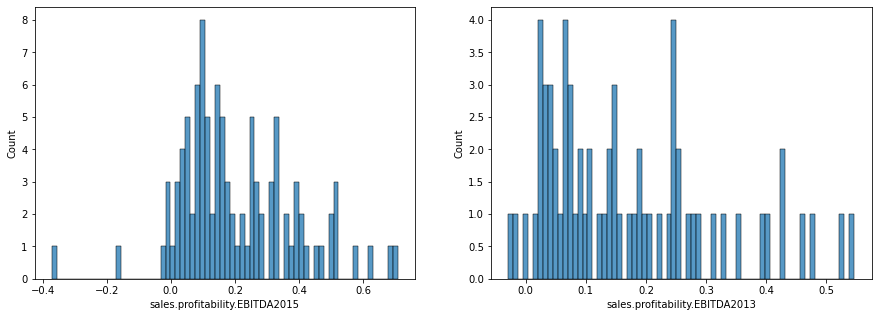

In [11]:
fig, ax = plt.subplots(1 ,2, figsize = (15, 5))
sns.histplot(ax = ax[0],data = PO_coef_frame, x = 'sales.profitability.EBITDA2015',bins = 70)
sns.histplot(ax = ax[1],data = SO_coef_frame, x = 'sales.profitability.EBITDA2013', bins = 70);

In [12]:
sum(~PO_coef_frame['sales.profitability.EBITDA2013'].isnull())

99

In [13]:
## PO hypotheses of normal distribution of observations

alpha = .0479 ## critical alpha

for i in range(2,PO_coef_frame.shape[1]):
    if stats.normaltest(PO_coef_frame.iloc[:,i], nan_policy = 'omit')[1] > alpha:
        print('В столбце ' + str(i) + ' нельзя принять гипотезу о нормальном распределении')
        
## for columns 28, 38 - problematic accepting

In [14]:
## SO hypotheses of normal distribution of observations

alpha = .0164 ## critical alpha

for i in range(2,SO_coef_frame.shape[1]):
    if stats.normaltest(SO_coef_frame.iloc[:,i], nan_policy = 'omit')[1] > alpha:
        print('В столбце ' + str(i) + ' нельзя принять гипотезу о нормальном распределении')
        
## for columns 66, 71, 73 - problematic accepting        

In [15]:
## comparison for PO and SO whether PO and SO are peforming similarly or SO worser 
hyp_mx = pd.DataFrame({'year': np.arange(2012, 2021)})

def hypothesis(df, pos, alpha = .001, assumption = 'not equal'):
    d = (((df.iloc[pos].PO_std**2 / (df.iloc[pos].PO_counts - 1))
          + (df.iloc[pos].SO_std**2 / (df.iloc[pos].SO_counts - 1)))**.5)
    z_observed = (df.iloc[pos].SO_means-df.iloc[pos].PO_means) / d
    
    z_critical = {.05 : 1.96, .01: 2.56, .001: 3.29}
    
    if assumption == 'not equal':
        if abs(z_observed) < z_critical[alpha]:
            return 'equal'
        else: 
            if df.iloc[pos].SO_means > df.iloc[pos].PO_means:
                return 'better'
            else:
                return 'worser'

In [16]:
pd.concat([pd.merge(SO_coef_frame.agg(np.mean).rename('SO_means'),
                    PO_coef_frame.agg(np.mean).rename('PO_means'),
                    left_index = True, right_index = True).reset_index(),
           SO_coef_frame.iloc[:,2:].agg(lambda x: len(x[~x.isnull()])).rename('SO_nums').reset_index(),
           PO_coef_frame.iloc[:,2:].agg(lambda x: len(x[~x.isnull()])).rename('PO_nums').reset_index()], axis = 1)

pd.concat([pd.merge(SO_coef_frame.agg(np.mean).rename('SO_means'),
                    PO_coef_frame.agg(np.mean).rename('PO_means'),
                    left_index = True, right_index = True).reset_index(),
          ])

,index,SO_means,PO_means
0,autonomy.coef.2012,0.542508,0.290162
1,autonomy.coef.2013,0.549689,0.293045
2,autonomy.coef.2014,0.543181,0.264767
3,autonomy.coef.2015,0.545607,0.284329
4,autonomy.coef.2016,0.558581,0.326070
...,...,...,...
121,resource.allocation2016,0.027485,0.370661
122,resource.allocation2017,0.023510,0.364801
123,resource.allocation2018,0.016308,0.331804
124,resource.allocation2019,0.022256,0.392983


In [17]:
pd.concat([SO_coef_frame.agg(np.mean).rename('SO_means'),SO_coef_frame.agg(np.std).rename('SO_stds'), 
           PO_coef_frame.agg(np.mean).rename('PO_means'),PO_coef_frame.agg(np.std).rename('PO_stds')],
          join = 'inner', axis = 1)

,SO_means,SO_stds,PO_means,PO_stds
autonomy.coef.2012,0.542508,0.832311,0.290162,0.349897
autonomy.coef.2013,0.549689,0.806352,0.293045,0.356215
autonomy.coef.2014,0.543181,0.512294,0.264767,0.415815
autonomy.coef.2015,0.545607,0.447532,0.284329,0.430430
autonomy.coef.2016,0.558581,0.504008,0.326070,0.411330
...,...,...,...,...
resource.allocation2016,0.027485,0.184678,0.370661,0.460483
resource.allocation2017,0.023510,0.182000,0.364801,0.422912
resource.allocation2018,0.016308,0.246409,0.331804,0.372578
resource.allocation2019,0.022256,0.356808,0.392983,0.408902


In [18]:
frame_analyze = pd.concat([SO_coef_frame.agg(np.mean).rename('SO_means'),
                           SO_coef_frame.agg(np.std).rename('SO_stds'),
                           SO_coef_frame.iloc[2:].count().rename('SO_counts'),
                           PO_coef_frame.agg(np.mean).rename('PO_means'),
                           PO_coef_frame.agg(np.std).rename('PO_stds'),
                           PO_coef_frame.iloc[2:].count().rename('PO_counts')],
                          join = 'inner', axis = 1)
frame_analyze.index = frame_analyze.index.map(lambda x: x[:-4])

frame_analyze = frame_analyze.reset_index()

result_to_check = frame_analyze.groupby('index').agg({'SO_means': np.mean,
                                                      'SO_stds' : [lambda x: x.mul(frame_analyze.SO_counts).sum()
                                                                   /frame_analyze.SO_counts.sum()] ,
                                                      'SO_counts': 'sum',
                                                      'PO_means': np.mean,
                                                      'PO_stds' : [lambda x: x.mul(frame_analyze.PO_counts).sum()
                                                                   /frame_analyze.PO_counts.sum()] ,
                                                      'PO_counts': 'sum'})

result_to_check = pd.concat([frame_analyze.groupby('index')[['SO_stds','PO_stds']].std(),
                             result_to_check], join = 'inner', axis = 1)

result_to_check.columns = ['SO_stds_sub_gr', 'PO_stds_sub_gr',
                           'SO_means','SO_stds', 'SO_counts',
                           'PO_means','PO_stds', 'PO_counts']

for i in ['S','P']:
    result_to_check[i + 'O_std'] = (result_to_check[i + 'O_stds_sub_gr'] ** 2 
                                    + result_to_check[i + 'O_stds'] ** 2) ** .5
    

result_to_check.reset_index(inplace = True)

result_to_check['Equality_hypothesis'] = [hypothesis(result_to_check, i, assumption = 'not equal')
                                             for i in range(0,result_to_check.shape[0])]


display(result_to_check)

,index,SO_stds_sub_gr,PO_stds_sub_gr,SO_means,SO_stds,SO_counts,PO_means,PO_stds,PO_counts,SO_std,PO_std,Equality_hypothesis
0,ROA.EBIT,0.625503,0.539755,3.673476,1.587085,19361,10.690441,1.400804,51500,1.705900,1.501195,worser
1,ROA.NET.PROFIT,824.288667,3.208499,-3.453065,73.228112,17890,7.530672,1.615712,51856,827.534992,3.592351,equal
2,ROCE,7.714701,10.764384,5.428282,1.982898,8688,26.796724,3.491604,34772,7.965457,11.316504,worser
3,ROE.EBIT,185.200850,11290.772511,6.224418,21.170845,17743,139.195489,549.952348,51767,186.406973,11304.158150,equal
4,ROE.NET.PROFIT,5.840478,7.897089,6.680384,4.603673,17910,25.746012,5.584201,47351,7.436732,9.671986,worser
5,abs.liq,0.584542,0.457367,1.948736,0.350419,19756,1.851183,0.294568,51815,0.681530,0.544017,better
6,autonomy.coef.,0.163979,0.042746,0.562217,0.052780,19799,0.318181,0.032430,51857,0.172264,0.053656,better
7,current.liq,0.625851,0.499372,2.588945,0.408317,19747,2.523318,0.340493,51809,0.747270,0.604407,better
8,gearing.,0.053487,0.150474,0.416922,0.082459,17496,1.110486,0.123592,44500,0.098287,0.194724,worser
9,resource.allocation,0.061092,0.045487,0.023630,0.020775,19799,0.320736,0.031100,51858,0.064528,0.055103,worser


In [19]:
SO_coef_frame

,Название.компании.Latin.alphabet,industry,autonomy.coef.2012,autonomy.coef.2013,autonomy.coef.2014,autonomy.coef.2015,autonomy.coef.2016,autonomy.coef.2017,autonomy.coef.2018,autonomy.coef.2019,...,ROA.EBIT2020,resource.allocation2012,resource.allocation2013,resource.allocation2014,resource.allocation2015,resource.allocation2016,resource.allocation2017,resource.allocation2018,resource.allocation2019,resource.allocation2020
0,PUBLIC JOINT STOCK COMPANY GAZPROM,TRANSPORTATION AND STORAGE,0.709213,0.717043,0.666779,0.640077,0.676274,0.658788,0.661983,0.667921,...,0.57,0.102408,0.084790,0.010476,0.046156,0.056247,0.039164,0.069978,0.054971,0.005796
1,PUBLICHNOE AKTSIONERNOE OBSCHESTVO NEFTYANAYA ...,MANUFACTURING,0.584739,0.420794,0.329785,0.303775,0.340200,0.342084,0.355314,0.397729,...,1.06,0.091413,0.072899,0.039835,0.036818,0.015652,0.018155,0.041708,0.054457,0.009577
2,PUBLIC JOINT STOCK COMPANY GAZPROM NEFT,MINING AND QUARRYING,0.654963,0.638271,0.538577,0.502316,0.566604,0.566255,0.565709,0.578541,...,3.37,0.132732,0.113784,0.058203,0.044121,0.078538,0.086441,0.106980,0.104615,0.027634
3,JOINT STOCK COMPANY RUSSIAN RAILWAYS,TRANSPORTATION AND STORAGE,0.803966,0.773410,0.725478,0.706014,0.744325,0.721334,0.696508,0.677134,...,1.15,0.003258,0.000162,-0.009094,0.000063,0.001144,0.002935,0.002935,0.008047,0.000040
4,PUBLIC JOINT STOCK COMPANY TRANSNEFT,TRANSPORTATION AND STORAGE,0.587409,0.621300,0.553226,0.559566,0.620352,0.640911,0.647281,0.651443,...,5.38,0.088490,0.071715,0.023275,0.053438,0.084162,0.066479,0.070331,0.053878,0.039994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,LLC MIRALOGIC SYSTEM INTEGRATION,CONSTRUCTION,0.038462,0.109336,0.422535,0.701195,0.631579,0.560799,0.603104,0.768539,...,-58.76,0.089744,0.087468,0.208451,0.239044,0.100251,0.079855,0.035477,0.085393,-0.531100
2198,TAMBOVSKII TSENTRALNYI RYNOK,REAL ESTATE ACTIVITIES,0.512479,0.649225,0.647773,0.655340,0.622642,0.619863,0.619926,0.712687,...,24.33,0.054908,0.025194,0.044534,0.092233,0.037736,0.071918,0.129151,0.052239,-0.142857
2199,AKTSIONERNOE OBSHCHESTVO PENZENSKOE OBYEDINENI...,TRANSPORTATION AND STORAGE,0.703554,0.786484,0.706767,0.731076,0.685962,0.584775,0.675393,0.694675,...,13.67,0.019386,0.001959,0.004511,0.007968,0.050651,0.065744,0.064136,0.069822,0.010324
2200,AKTSIONERNOE OBSHCHESTVO RASPORYADITELNAYA DIR...,REAL ESTATE ACTIVITIES,0.802283,0.814656,0.804640,0.883915,0.929689,0.210197,0.076923,0.022376,...,-6.69,0.079426,0.094895,0.073993,0.148911,0.148086,-0.158668,-0.106821,-0.054330,-0.079628


In [20]:
#checking for problems when tested
for i in(SO_coef_frame.industry.unique()[-2:]):
    print(i)
    frame_analyze = pd.concat([SO_coef_frame[SO_coef_frame.industry == i].agg(np.mean).rename('SO_means'),
                               SO_coef_frame[SO_coef_frame.industry == i].agg(np.std).rename('SO_stds'),
                               SO_coef_frame[SO_coef_frame.industry == i].iloc[2:].count().rename('SO_counts'),
                               PO_coef_frame[PO_coef_frame.industry == i].agg(np.mean).rename('PO_means'),
                               PO_coef_frame[PO_coef_frame.industry == i].agg(np.std).rename('PO_stds'),
                               PO_coef_frame[PO_coef_frame.industry == i].iloc[2:].count().rename('PO_counts')],
                              join = 'inner', axis = 1)
    frame_analyze.index = frame_analyze.index.map(lambda x: x[:-4])
    
    frame_analyze = frame_analyze.reset_index()

    result_to_check = frame_analyze.groupby('index').agg({'SO_means': np.mean,
                                                          'SO_stds' : [lambda x: x.mul(frame_analyze.SO_counts).sum()
                                                                       /frame_analyze.SO_counts.sum()] ,
                                                          'SO_counts': 'sum',
                                                          'PO_means': np.mean,
                                                          'PO_stds' : [lambda x: x.mul(frame_analyze.PO_counts).sum()
                                                                       /frame_analyze.PO_counts.sum()] ,
                                                          'PO_counts': 'sum'})

    result_to_check = pd.concat([frame_analyze.groupby('index')[['SO_stds','PO_stds']].std(),
                                 result_to_check], join = 'inner', axis = 1)

    result_to_check.columns = ['SO_stds_sub_gr', 'PO_stds_sub_gr',
                               'SO_means','SO_stds', 'SO_counts',
                               'PO_means','PO_stds', 'PO_counts']

    for i in ['S','P']:
        result_to_check[i + 'O_std'] = (result_to_check[i + 'O_stds_sub_gr'] ** 2 
                                        + result_to_check[i + 'O_stds'] ** 2) ** .5


    result_to_check.reset_index(inplace = True)

    result_to_check['Equality_hypothesis'] = [hypothesis(result_to_check, i, assumption = 'not equal')
                                                 for i in range(0,result_to_check.shape[0])]

    display(result_to_check)

OTHER SERVICE ACTIVITIES


,index,SO_stds_sub_gr,PO_stds_sub_gr,SO_means,SO_stds,SO_counts,PO_means,PO_stds,PO_counts,SO_std,PO_std,Equality_hypothesis
0,ROA.EBIT,3.001327,4.458449,10.129319,1.882416,125,8.075556,1.188055,63,3.542803,4.614027,equal
1,ROA.NET.PROFIT,4.539855,3.613754,6.107183,1.101300,115,4.188465,1.015280,63,4.671525,3.753667,equal
2,ROCE,9.101696,114.782206,12.933333,0.104098,11,17.583611,2.628200,24,9.102292,114.812292,equal
3,ROE.EBIT,17.159348,121.837923,21.772498,3.079796,112,53.969179,14.340723,63,17.433542,122.678995,equal
4,ROE.NET.PROFIT,6.731828,80.240064,9.029968,1.314574,115,6.718179,5.136593,61,6.858981,80.404307,equal
5,abs.liq,0.645164,0.753465,1.262083,0.134333,126,1.558642,0.104467,63,0.659001,0.760673,equal
6,autonomy.coef.,0.091110,0.062509,0.733410,0.024937,126,0.338330,0.026595,63,0.094461,0.067931,better
7,current.liq,0.648428,0.863349,2.179167,0.155179,126,1.889136,0.129680,63,0.666738,0.873034,equal
8,gearing.,0.024052,0.458508,0.017350,0.002984,115,0.819718,0.099186,59,0.024237,0.469113,worser
9,resource.allocation,0.053889,0.062162,0.044596,0.012187,126,0.348684,0.026066,63,0.055249,0.067405,worser


EDUCATION


,index,SO_stds_sub_gr,PO_stds_sub_gr,SO_means,SO_stds,SO_counts,PO_means,PO_stds,PO_counts,SO_std,PO_std,Equality_hypothesis
0,ROA.EBIT,8.638853,15.235314,7.524444,NaN,0,5.154444,NaN,0,NaN,NaN,better
1,ROA.NET.PROFIT,50.237198,9.501924,16.343582,NaN,0,1.400464,NaN,0,NaN,NaN,better
2,ROCE,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,worser
3,ROE.EBIT,55.184472,92.820296,20.379150,NaN,0,41.316709,NaN,0,NaN,NaN,worser
4,ROE.NET.PROFIT,52.040704,21.555000,16.896111,NaN,0,42.025000,NaN,0,NaN,NaN,worser
5,abs.liq,2.451688,0.375533,4.204444,NaN,0,1.285556,NaN,0,NaN,NaN,better
6,autonomy.coef.,0.109479,0.427067,0.669108,NaN,0,-0.061751,NaN,0,NaN,NaN,better
7,current.liq,2.567041,0.372946,4.328333,NaN,0,1.295556,NaN,0,NaN,NaN,better
8,gearing.,0.000072,0.023000,0.000022,NaN,0,0.799111,NaN,0,NaN,NaN,worser
9,resource.allocation,0.088209,0.433382,0.054369,NaN,0,-0.075757,NaN,0,NaN,NaN,better


In [21]:
## Education sample is low (2 in both)
## Educaion is in SO companies

display(PO[PO.industry == 'EDUCATION'])
SO[SO.industry == 'EDUCATION']

,X.U.FEFF.,Название.компании.Latin.alphabet,Код.консолидации,Глобальные.конечный.собственник..ГКС....Название,NACE.Rev..2.Основной.код..4.цифры.,ISH...Прямой..,ISH...Общий..,Выручка..оборот..тыс.доллар.США.2020,Выручка..оборот..тыс.доллар.США.2019,Выручка..оборот..тыс.доллар.США.2018,...,Количество.работников.2020,Количество.работников.2019,Количество.работников.2018,Количество.работников.2017,Количество.работников.2016,Количество.работников.2015,Количество.работников.2014,Количество.работников.2013,Количество.работников.2012,industry
2512,2519,MOSCOW UNIVERSITY OF FINANCE AND LAW MFUA,U1,MR ALEKSEI GRIGORYEVICH ZABELIN,85,80.0,NaN,38426,27333,19418,...,346.0,333.0,322.0,311.0,302.0,293.0,282.0,271.0,262.0,EDUCATION
4101,1329,NON-STATE SAKHALIN TECHNICAL TRAINING CENTRE,U1,PETROFAC LIMITED,85,100.0,100.0,18943,17401,7153,...,123.0,112.0,97.0,78.0,87.0,78.0,67.0,58.0,45.0,EDUCATION


,X.U.FEFF.,Название.компании.Latin.alphabet,Код.консолидации,Глобальные.конечный.собственник..ГКС....Название,NACE.Rev..2.Основной.код..4.цифры.,ISH...Прямой..,ISH...Общий..,Выручка..оборот..тыс.доллар.США.2020,Выручка..оборот..тыс.доллар.США.2019,Выручка..оборот..тыс.доллар.США.2018,...,Количество.работников.2020,Количество.работников.2019,Количество.работников.2018,Количество.работников.2017,Количество.работников.2016,Количество.работников.2015,Количество.работников.2014,Количество.работников.2013,Количество.работников.2012,industry
2058,2065,CHASTNOE OBRAZOVATELNOE UCHREZHDENIE DOPOLNITE...,U1,GOVERNMENT OF THE RUSSIAN FEDERATION,85,78.92,NaN,1377,2079,1249,...,40.0,47.0,40.0,33.0,40.0,57.0,42.0,35.0,40.0,EDUCATION
2118,2125,GOSUDARSTVENNOE PREDPRIYATIE UCHEBNO-KURSOVOI ...,U1,KOMITET PO ZHILISHCHNO-KOMMUNALNOMU KHOZYAISTV...,85,100.00,100.0,1231,1943,1681,...,113.0,124.0,115.0,104.0,113.0,104.0,93.0,104.0,95.0,EDUCATION
